In [16]:
import pandas as pd
music_data = pd.read_csv(r"C:\Users\Anuj\Downloads\Python Projects\music.csv")
music_data

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


Divide the dataset in to two dataset as input annd out put ( first tow coumns will be input and the third column genre will be ouput) and will be used to predict output

In [17]:
x = music_data.drop(columns = ['genre'])
x

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [31]:
y = music_data["genre"]
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

Now the dataset is prepared and ready to build the model ( considering there are no dups and null values in the dataset)

In [32]:
from sklearn.tree import DecisionTreeClassifier  


In [48]:
model = DecisionTreeClassifier()
model.fit(x,y)
predictions = model.predict([[21,1],[22,0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

so far you can see that our model predicited it correctly 21 years old Male likes Hiphop and 22 years old female likes Dance.

But The models we make with the complex data dont always have accurate predicition and we need various tweaks

For now lets check the accurac of the model by splitting the dataset in to train and test dataset

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [113]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model.fit(x_train, y_train)
predicitions = model.predict (x_test)
score = accuracy_score(y_test, predicitions)  
score     #run multiple times accuracy will vary 

0.5

In [102]:
import random
random.seed(5)  # in case if you want to fix your result use seed . It genrates same random numbers everytime
score

0.75

Model Presistance 

In [115]:
import joblib

In [116]:
joblib.dump( model, 'music-recommender.joblib')

['music-recommender.joblib']

In [124]:
#Next time you dont have to build the model just load the model
joblib.load('music-recommender.joblib')
predicitons = model.predict([[21,1],[30,0]])
predicitons   # Wippie it works

array(['HipHop', 'Acoustic'], dtype=object)

In [126]:
from sklearn import tree
tree.export_graphviz(model,out_file = 'music-recommender.dot', feature_names = ['age', 'gender'], class_names = sorted(y.unique()), label = "all", rounded = True, filled = True)

The  above dot file is saved on your drive, drag and drop to Visual code studio , install Graphviz under extensionand you can visualize it in VFS and you will see a decision tree

In [139]:
%%html
<img src = "C:\Users\Anuj\Downloads\Python Projects\Machine learning music\tree.png",width = 200, height = 600>

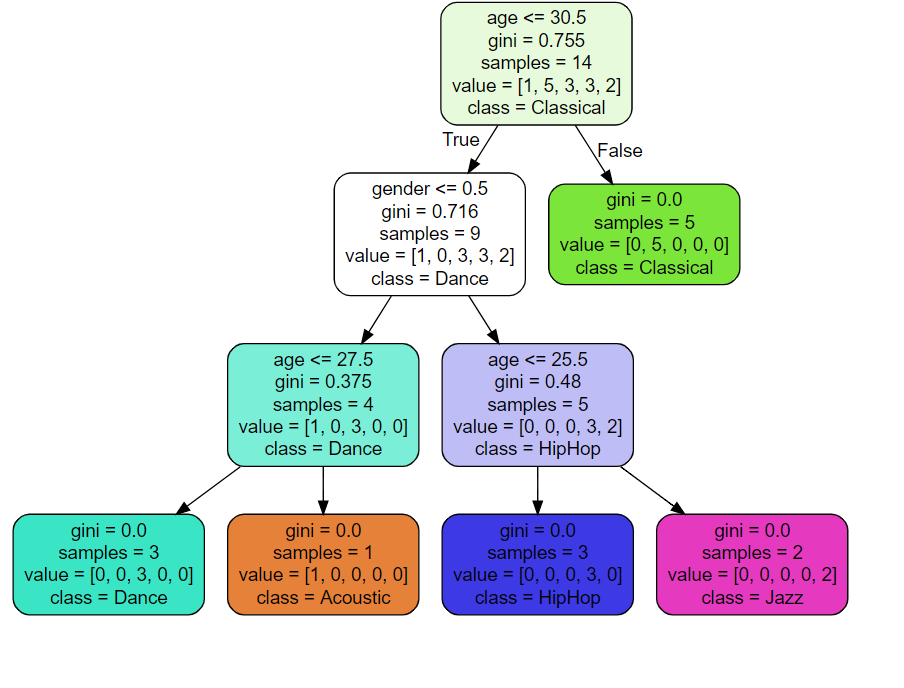

In [142]:
from PIL import Image    # if you have any questions how did I build this tree or uploaded in the jupyter notebook shoot me a message
img = Image.open('Tree.png')
img